# post installation pySpark
https://datawookie.netlify.com/blog/2017/07/accessing-pyspark-from-a-jupyter-notebook/

In [1]:
import findspark
findspark.init()

In [2]:
import pyspark

Create a spark context

In [3]:
sc = pyspark.SparkContext(appName= ' test')

In [4]:
sc.master

'local[*]'

Destroy the spark context

In [5]:
sc.appName

' test'

In [6]:
sc.stop()

# Datacamp

## Examining The SparkContext
In this exercise you'll get familiar with the SparkContext.

You'll probably notice that code takes longer to run than you might expect. This is because Spark is some serious software. It takes more time to start up than you might be used to. You may also find that running simpler computations might take longer than expected. That's because all the optimizations that Spark has under its hood are designed for complicated operations with big data sets. That means that for simple or small problems Spark may actually perform worse than some other solutions!

### code

In [7]:
sc = pyspark.SparkContext(appName= ' test')

In [8]:
# Verify SparkContext
print(sc)

# Print Spark version
print(sc.version)

<SparkContext master=local[*] appName= test>
2.4.5


## Creating a SparkSession
We've already created a SparkSession for you called spark, but what if you're not sure there already is one? Creating multiple SparkSessions and SparkContexts can cause issues, so it's best practice to use the SparkSession.builder.getOrCreate() method. This returns an existing SparkSession if there's already one in the environment, or creates a new one if necessary!

### code

In [9]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Create my_spark
my_spark = SparkSession.builder.getOrCreate()

# Print my_spark
print(my_spark)

## Viewing tables
Once you've created a SparkSession, you can start poking around to see what data is in your cluster!

Your SparkSession has an attribute called catalog which lists all the data inside the cluster. This attribute has a few methods for extracting different pieces of information.

One of the most useful is the .listTables() method, which returns the names of all the tables in your cluster as a list.

### code

In [10]:
# Print the tables in the catalog
print(my_spark.catalog.listTables())

[]


## Are you query-ious?
One of the advantages of the DataFrame interface is that you can run SQL queries on the tables in your Spark cluster. If you don't have any experience with SQL, don't worry, we'll provide you with queries! (To learn more SQL, start with our Introduction to SQL course.)

As you saw in the last exercise, one of the tables in your cluster is the flights table. This table contains a row for every flight that left Portland International Airport (PDX) or Seattle-Tacoma International Airport (SEA) in 2014 and 2015.

Running a query on this table is as easy as using the .sql() method on your SparkSession. This method takes a string containing the query and returns a DataFrame with the results!

If you look closely, you'll notice that the table flights is only mentioned in the query, not as an argument to any of the methods. This is because there isn't a local object in your environment that holds that data, so it wouldn't make sense to pass the table as an argument.

Remember, we've already created a SparkSession called spark in your workspace. (It's no longer called my_spark because we created it for you!)

### code

In [12]:
# Don't change this query
query = "FROM flights SELECT * LIMIT 10"

# Get the first 10 rows of flights
flights10 = my_spark.sql(query)

# Show the results
flights10.show()

AnalysisException: 'Table or view not found: flights; line 1 pos 5'

## Pandafy a Spark DataFrame
Suppose you've run a query on your huge dataset and aggregated it down to something a little more manageable.

Sometimes it makes sense to then take that table and work with it locally using a tool like pandas. Spark DataFrames make that easy with the .toPandas() method. Calling this method on a Spark DataFrame returns the corresponding pandas DataFrame. It's as simple as that!

This time the query counts the number of flights to each airport from SEA and PDX.

Remember, there's already a SparkSession called spark in your workspace!

### code

In [13]:
# Don't change this query
query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# Run the query
flight_counts = spark.sql(query)

# Convert the results to a pandas DataFrame
pd_counts = flight_counts.toPandas()

# Print the head of pd_counts
print(pd_counts.head())

NameError: name 'spark' is not defined

## Put some Spark in your data
In the last exercise, you saw how to move data from Spark to pandas. However, maybe you want to go the other direction, and put a pandas DataFrame into a Spark cluster! The SparkSession class has a method for this as well.

The .createDataFrame() method takes a pandas DataFrame and returns a Spark DataFrame.

The output of this method is stored locally, not in the SparkSession catalog. This means that you can use all the Spark DataFrame methods on it, but you can't access the data in other contexts.

For example, a SQL query (using the .sql() method) that references your DataFrame will throw an error. To access the data in this way, you have to save it as a temporary table.

You can do this using the .createTempView() Spark DataFrame method, which takes as its only argument the name of the temporary table you'd like to register. This method registers the DataFrame as a table in the catalog, but as this table is temporary, it can only be accessed from the specific SparkSession used to create the Spark DataFrame.

There is also the method .createOrReplaceTempView(). This safely creates a new temporary table if nothing was there before, or updates an existing table if one was already defined. You'll use this method to avoid running into problems with duplicate tables.

Check out the diagram to see all the different ways your Spark data structures interact with each other.

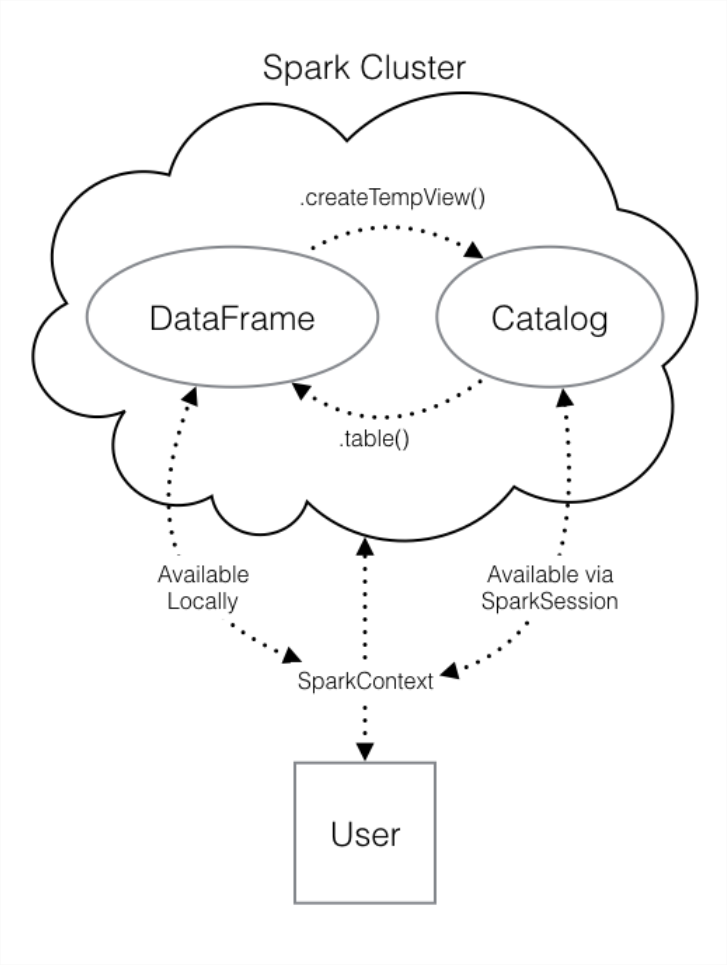

There's already a SparkSession called spark in your workspace, numpy has been imported as np, and pandas as pd.

### init

In [6]:
# $SPARK_HOME/sbin/start-master.sh
import findspark
findspark.init()

import numpy as np
import pandas as pd
import pyspark
from pyspark.sql import SparkSession

# Create my_spark
spark = SparkSession.builder.getOrCreate()


### code

In [8]:
# Create pd_temp
pd_temp = pd.DataFrame(np.random.random(10))

# Create spark_temp from pd_temp
spark_temp = spark.createDataFrame(pd_temp)

# Examine the tables in the catalog
print(spark.catalog.listTables())

# Add spark_temp to the catalog
spark_temp.createOrReplaceTempView('temp')

# Examine the tables in the catalog again
print(spark.catalog.listTables())

[Table(name='temp', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]
[Table(name='temp', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


## Dropping the middle man
Now you know how to put data into Spark via pandas, but you're probably wondering why deal with pandas at all? Wouldn't it be easier to just read a text file straight into Spark? Of course it would!

Luckily, your SparkSession has a .read attribute which has several methods for reading different data sources into Spark DataFrames. Using these you can create a DataFrame from a .csv file just like with regular pandas DataFrames!

The variable file_path is a string with the path to the file airports.csv. This file contains information about different airports all over the world.

A SparkSession named spark is available in your workspace.

### init

In [1]:
from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO_pushto_fileio('/usr/local/share/datasets/airports.csv')
"""

tobedownloaded="""
{numpy.ndarray: {'airports.csv': 'https://file.io/9YjgsG'}}
"""
prefixToc = '2.7'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")


Téléchargements à lancer
{'numpy.ndarray': {'airports.csv': 'https://file.io/9YjgsG'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84548    0 84548    0     0  37982      0 --:--:--  0:00:02 --:--:-- 37999



In [2]:
# $SPARK_HOME/sbin/start-master.sh
import findspark
findspark.init()

import numpy as np
import pandas as pd
import pyspark
from pyspark.sql import SparkSession

# Create my_spark
spark = SparkSession.builder.getOrCreate()

### code

In [7]:
# Don't change this file path
file_path = "/home/guillaume/git/data-scientist-skills/python-sandbox/introduction-to-pyspark/data_from_datacamp/chapter1-Exercise2.7_airports.csv"

# Read in the airports data
airports = spark.read.csv(file_path, header=True)

# Show the data
airports.show()

+---+--------------------+----------------+-----------------+----+---+---+
|faa|                name|             lat|              lon| alt| tz|dst|
+---+--------------------+----------------+-----------------+----+---+---+
|04G|   Lansdowne Airport|      41.1304722|      -80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|      32.4605722|      -85.6800278| 264| -5|  A|
|06C| Schaumburg Regional|      41.9893408|      -88.1012428| 801| -6|  A|
|06N|     Randall Airport|       41.431912|      -74.3915611| 523| -5|  A|
|09J|Jekyll Island Air...|      31.0744722|      -81.4277778|  11| -4|  A|
|0A9|Elizabethton Muni...|      36.3712222|      -82.1734167|1593| -4|  A|
|0G6|Williams County A...|      41.4673056|      -84.5067778| 730| -5|  A|
|0G7|Finger Lakes Regi...|      42.8835647|      -76.7812318| 492| -5|  A|
|0P2|Shoestring Aviati...|      39.7948244|      -76.6471914|1000| -5|  U|
|0S9|Jefferson County ...|      48.0538086|     -122.8106436| 108| -8|  A|
|0W3|Harford County Ai...